<a href="https://colab.research.google.com/github/takaito1/EAS4821_S2024/blob/main/scripts/lab3_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab3: The t-test and confidence interval

Pick a US city other than Atlanta (you can re-use the data from past weeks or download a new one).

1. Test whether or not the mean July temperature for recent decade (2014-2023) is significantly warmer than the long term average. Follow the 5 steps discussed in the class to perform the one-tail t-test.

2. Test whether or not the mean July temperature for recent decade (2014-2023) is significantly different from the average over 1980s (1981-1990). Again, follow the 5 steps discussed in the class. Should you be using one-tail or two-tail test? Explain your choice.

3. Consider testing a new laboratory instrument by measuring the same sample 10 times. The measurements are x = [9.8, 10.1, 10.2, 9.7, 9.6, 10.5, 10.4, 9.9, 10.2, 10.3].

          - What are the standard deviation and standard error of this measurement? Explain the difference in your own words.

          - Calculate the 95% confidence interval on the true mean. (Since N=10, you need to use the Student's t-distribution for this calculation)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t as tdist
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# get data : boston.csv
df = pd.read_csv('/content/drive/MyDrive/EAS2655_4821/boston.csv',
                 na_values=-999,index_col=0)
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
YEAR,,,,,,,,,,,,,
1872,NaN,NaN,26.5,46.6,59.3,68.9,75.7,73.0,64.4,51.9,40.6,23.1,53.0
1873,25.1,26.4,33.9,44.9,56.5,67.3,72.9,69.8,62.8,53.5,33.3,32.1,48.2
1874,30.5,27.0,34.4,38.8,55.5,66.1,72.9,68.1,64.4,53.2,41.6,31.3,48.6
1875,20.1,22.3,31.3,42.5,57.9,66.7,72.1,71.0,59.6,50.1,34.9,29.6,46.5
1876,30.7,27.5,33.5,43.9,54.6,68.9,74.0,70.3,59.9,48.3,41.4,22.2,47.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,30.7,33.5,39.1,51.7,57.8,68.2,78.7,74.1,68.0,57.4,42.8,37.2,53.3
2020,38.0,37.8,41.8,44.6,56.8,69.2,75.3,74.1,65.6,54.7,48.0,36.0,53.5
2021,31.0,30.8,42.0,50.8,61.4,74.4,72.4,76.9,69.7,59.9,44.7,39.2,54.4


- Test whether or not the mean July temperature for recent decade (2014-2023) is significantly warmer than the long term average. Follow the 5 steps discussed in the class to perform the one-tail t-test.

Text(0, 0.5, 'JUL temperature, deg F')

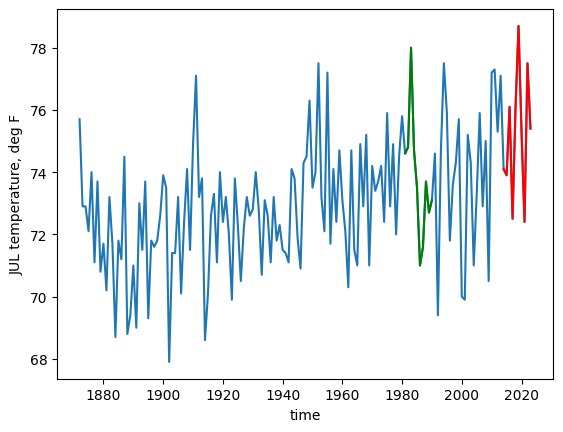

In [19]:
# take a look at the data first
df['JUL'].plot()
df['JUL'].loc[2014:2023].plot(color='r')
df['JUL'].loc[1981:1990].plot(color='g')
plt.xlabel('time')
plt.ylabel('JUL temperature, deg F')

In [13]:
# get the relevant data
mu = df['JUL'].mean() # long term mean
print('long term mean = '+str(np.round(mu,1))+' deg F')
#
X = df['JUL'].loc[2014:2023].mean() # last 10 year ave
print('2014-2023 mean = '+str(np.round(X,1))+' deg F')
#
s = df['JUL'].loc[2014:2023].std() # last 10 year std
print('2014-2023 stdev = '+str(np.round(s,1))+' deg F')
#
SE = s/np.sqrt(10-1) # SE of 10 year mean temp
print('SE = '+str(np.round(SE,1))+'deg F')

long term mean = 73.1 deg F
2014-2023 mean = 75.2 deg F
2014-2023 stdev = 2.0 deg F
SE = 0.7deg F


### Step 1. State confidence level
- We use 95% confidence level

In [14]:
CL = 95

### Step 2. State null hypothesis and alternative hypothesis
- H0: Last 10 years mean temperature (2014-2023) is NOT significantly warmer than long term mean temp.
- H1: Last 10 years mean temperature (2014-2023) is significantly warmer than long term mean temp.

### Step 3. State statistics used.
- We use t-distribution with one tail test.

### Step 4. Calculate the critical region.

In [16]:
alpha = 1 - CL/100
tcrit = tdist.ppf(1-alpha,10-1)
print('critical t-value is '+str(tcrit)[:4])

critical t-value is 1.83


### Step 5. Evaluate whether the data is within or outside of the critical region

In [18]:
tvalue = (X-mu)/SE
print('t-value of the data is '+str(tvalue)[:4])

t-value of the data is 3.13


The t-value of the data is larger than the critical t-value. We reject the null hypothesis.